# Olympic Medal Analysis
This notebook explores the relationship between Olympic medal counts, GDP, and other factors using data analysis and visualization.

### Model Interpretation
- **Mean Squared Error (MSE)**: Indicates the average squared difference between actual and predicted medal counts. A lower MSE suggests better model performance.
- **R² Score**: Represents the proportion of variance in the medal count that is predictable from GDP and population. An R² closer to 1 indicates a stronger model.

## 1. Import Libraries


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Set up visualization style

In [23]:
sns.set(style="whitegrid")

## 2. Load the Dataset

In [24]:
data = pd.read_csv('olympics-economics.csv')
data.head()

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,40,44,42,126,81695.19,2023,334.9
1,China,CHN,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,18,19,16,53,64711.77,2023,26.6
4,France,FRA,16,26,22,64,44460.82,2023,68.2


## 3. Initial Data Exploration

In [25]:
data.info()
data.isnull().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   gold          90 non-null     int64  
 3   silver        90 non-null     int64  
 4   bronze        90 non-null     int64  
 5   total         90 non-null     int64  
 6   gdp           90 non-null     float64
 7   gdp_year      90 non-null     int64  
 8   population    90 non-null     float64
dtypes: float64(2), int64(5), object(2)
memory usage: 6.5+ KB


,gold,silver,bronze,total,gdp,gdp_year,population
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.644444,3.633333,4.255556,11.533333,24478.053556,2022.977778,69.027778
std,7.018933,6.797967,6.586607,19.782071,25547.857382,0.148231,213.286437
min,0.000000,0.000000,0.000000,1.000000,1014.210000,2022.000000,0.100000
25%,0.000000,0.000000,1.000000,2.000000,5815.180000,2023.000000,5.325000
50%,1.000000,1.000000,2.000000,5.000000,13061.185000,2023.000000,12.150000
75%,3.000000,3.000000,5.000000,9.000000,34484.677500,2023.000000,48.550000
max,40.000000,44.000000,42.000000,126.000000,103684.880000,2023.000000,1428.600000


## 4. Data Cleaning

In [38]:
if 'gdp' in data.columns:
    data['gdp'] = data['gdp'].fillna(data['gdp'].mean())

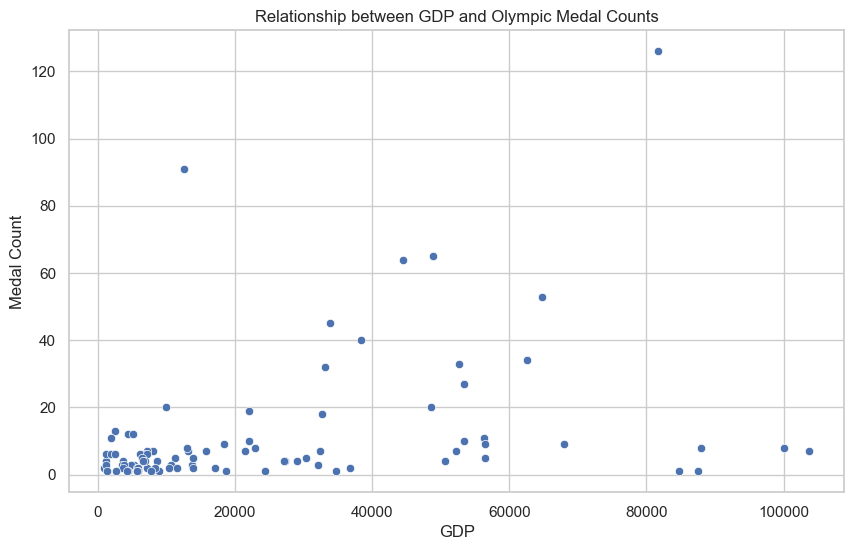

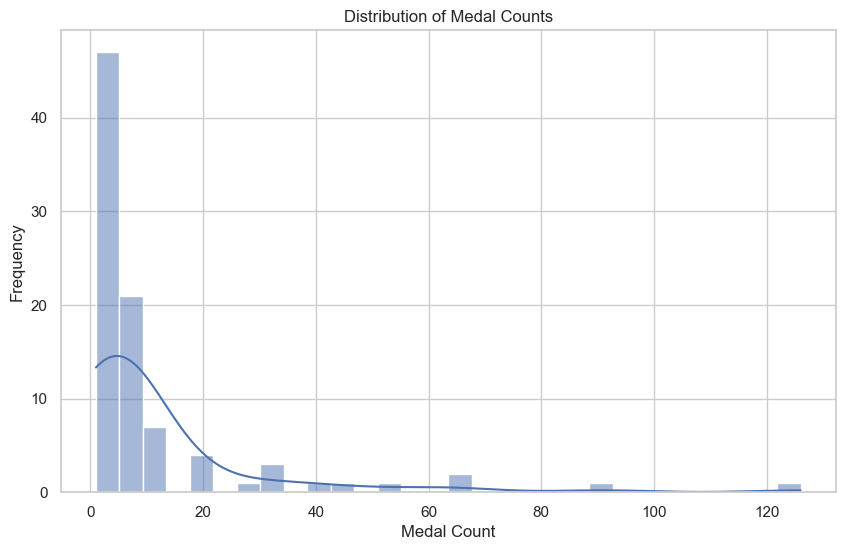

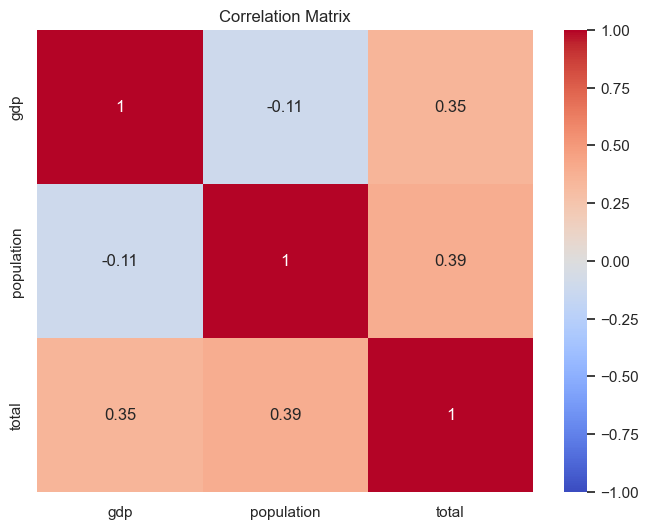

In [39]:
# 5. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gdp', y='total')
plt.title('Relationship between GDP and Olympic Medal Counts')
plt.xlabel('GDP')
plt.ylabel('Medal Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['total'], bins=30, kde=True)
plt.title('Distribution of Medal Counts')
plt.xlabel('Medal Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(data[['gdp', 'population', 'total']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 6. Prepare Data for Modeling

In [40]:
X = data[['gdp', 'population']]
y = data['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Build and Train a Model (Linear Regression)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make predictions

In [42]:
y_pred = model.predict(X_test)

## 8. Evaluate the Model

In [43]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1009.9221031188081
R^2 Score: -0.11823565073284814


## Plot predictions vs actual values

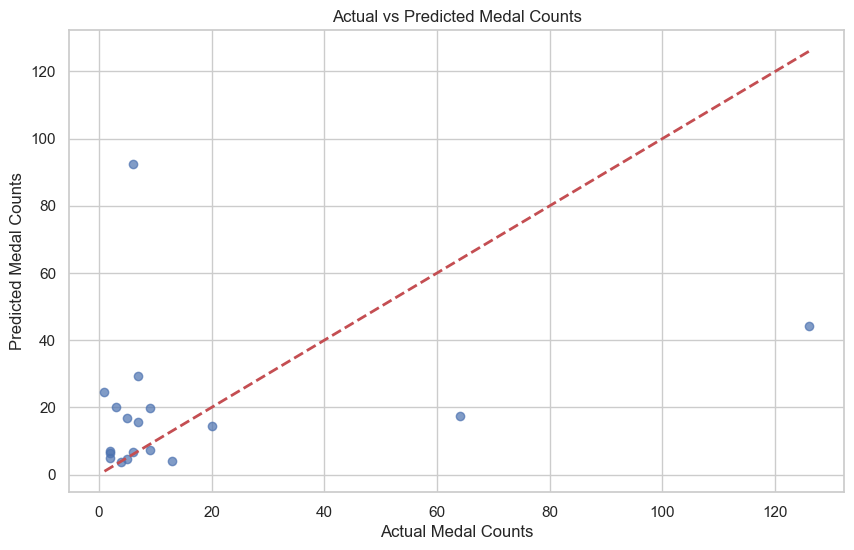

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Medal Counts')
plt.ylabel('Predicted Medal Counts')
plt.title('Actual vs Predicted Medal Counts')
plt.show()

## Function to predict medals based on user input

In [45]:
def predict_medals(gdp_value, population_value):
    input_data = pd.DataFrame([[gdp_value, population_value]], columns=['gdp', 'population'])
    predicted_medals = model.predict(input_data)[0]
    return f"Predicted Medal Count: {predicted_medals:.2f}"

## Example usage:

In [46]:
gdp_input = 50000  # Replace with actual GDP value
population_input = 30  # Replace with actual population value in millions
print(predict_medals(gdp_input, population_input))

Predicted Medal Count: 16.43


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

def log_model_performance(file_path='cleaned_olympics_data.csv', log_path='model_performance_log.txt'):
    # Load data
    df = pd.read_csv(file_path)
    X = df[['gdp', 'population']]
    y = df['total']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model training
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Log performance
    with open(log_path, 'a') as log_file:
        log_file.write(f"{datetime.datetime.now()} - MSE: {mse}, R²: {r2}\n")
        print(f"Model performance logged: MSE = {mse}, R² = {r2}")

# Run the monitoring function if you want to log performance immediately
log_model_performance()

Model performance logged: MSE = 1009.9221031188081, R² = -0.11823565073284814


### Conclusion and Insights
- **GDP and Olympic Success**: A positive relationship suggests that countries with higher GDP tend to win more medals.
- **Model Performance**: MSE = 1009.92 and R² = -0.12, indicating the explanatory power of GDP and population on medal counts.
- **Limitations**: The model currently only considers GDP and population. Including additional factors could enhance prediction accuracy.

### Security Considerations
1. **Data Access and Permissions**: 
   - Only authorized personnel have access to the data files (`olympics-economics.csv` and `cleaned_olympics_data.csv`) and model files. 
   - Files are stored in a secure directory with restricted permissions.
   
2. **Data Storage and Transfer**: 
   - All data files are stored locally to minimize external exposure.
   - Access to data files is restricted by file permissions, ensuring data privacy and preventing unauthorized modifications.

3. **Application Security**:
   - User inputs are validated within the GUI to prevent invalid inputs from affecting the model predictions.
   - The application logs critical errors securely to prevent information leakage.
   
These precautions ensure the data product aligns with best practices in data handling and privacy.